In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")

# to fetch data 
import yfinance as yf

import talib as ta

### Import stock data of TATA Motors

In [3]:
symbol = 'TATAMOTORS.NS'
start = '2020-01-01'
end = '2021-01-01'

# Read data 
df = yf.download(symbol,start,end)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,185.149994,186.699997,183.600006,184.449997,184.449997,25968357
2020-01-02,185.000000,194.699997,184.600006,193.750000,193.750000,57289863
2020-01-03,192.899994,195.649994,189.250000,191.100006,191.100006,47572728
2020-01-06,191.000000,191.000000,185.050003,185.649994,185.649994,28621212
2020-01-07,187.000000,189.399994,182.300003,184.699997,184.699997,34995035


In [4]:
n = 14
df['HL'] = df['High'] - df['Low']
df['HC'] = abs(df['High'] - df['Adj Close'].shift()) # high -previous days close
df['LC'] = abs(df['Low'] - df['Adj Close'].shift()) #low - previous days close
df['TR'] = df[['HL','HC','LC']].max(axis=1)
df['ATR'] = df['TR'].rolling(n).mean()
df = df.drop(['HL','HC','LC','TR'],axis=1)

In [5]:
#direct from lib function
#c = df['Close'].values
#h = df['High'].values
#l = df['Low'].values
#df['ATR']=ta.ATR(h, l, c, timeperiod=14)

Text(0.5, 0, 'Date')

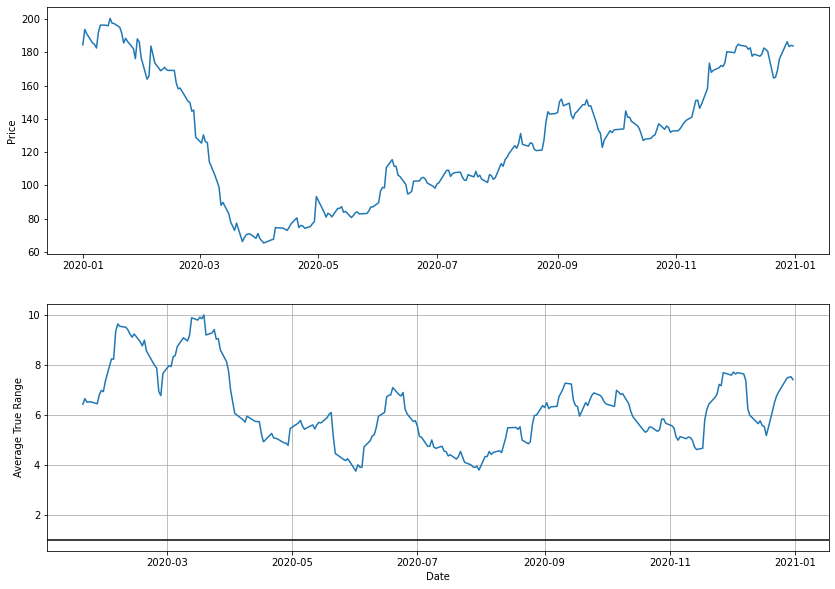

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['ATR'], label='ATR')
ax2.axhline(y=1, color='black')
ax2.grid()
ax2.set_ylabel('Average True Range')
ax2.set_xlabel('Date')